Author : *iamliontin*



```
# Klasifikasi Kasus Peretasan Website Pemerintahan Indonesia Menggunakan Metode Naive Bayes
```


In [10]:
import pandas as pd
import numpy as np
import time

In [199]:
zoneH = pd.read_excel('ZoneH-2021.xlsx')

In [200]:
zoneH.shape

(1125, 7)

In [201]:
zoneH.head()

,url,peretas,waktu,Arsip,web,provinsi,tipe
0,disbimasda.sanggau.go.id,Stressed Hacker Team,2022-01-02 00:00:00,www.zone-h.org/mirror/id/39204400,Pemerintahan,Kalimantan Barat,Subdomain
1,panjarbiaya.pa-nganjuk.go.id,AnonCoders,2022-01-01 00:00:00,www.zone-h.org/mirror/id/39203566,Pemerintahan,Jawa Timur,Subdomain
2,investasi.mojokertokab.go.id/r...,AnonCoders,2022-01-01 00:00:00,www.zone-h.org/mirror/id/39203514,Pemerintahan,Jawa Timur,Subdomain
3,wa-api.gianyarkab.go.id,AnonCoders,2021-12-31 00:00:00,www.zone-h.org/mirror/id/39202823,Pemerintahan,Bali,Subdomain
4,jdih-dprd.sultengprov.go.id/xy...,AnonCoders,2021-12-31 00:00:00,www.zone-h.org/mirror/id/39202812,Pemerintahan,Sulawesi Tengah,Subdomain


In [202]:
zoneH.tail()

,url,peretas,waktu,Arsip,web,provinsi,tipe
1120,akcaya.pta-pontianak.go.id/of....,DENNI5 ID,2021-06-20 00:00:00,www.zone-h.org/mirror/id/35148306,Pemerintahan,Kalimantan Barat,Subdomain
1121,bukutamu.pta-banten.go.id,Family Attack Cyber,2021-06-20 00:00:00,www.zone-h.org/mirror/id/35148287,Pemerintahan,Banten,Subdomain
1122,spplonline.tabanankab.go.id/pe...,F.Z MalaikatHati,2021-06-20 00:00:00,www.zone-h.org/mirror/id/35148197,Pemerintahan,Bali,Subdomain
1123,www.data.dprd-pesisirbaratkab....,rizk_hax0r,2021-06-20 00:00:00,www.zone-h.org/mirror/id/35148080,Pemerintahan,Lampung,Subdomain
1124,www.hukum.dprd-pesisirbaratkab...,rizk_hax0r,2021-06-20 00:00:00,www.zone-h.org/mirror/id/35148078,Pemerintahan,Lampung,Subdomain


In [203]:
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt

In [204]:
fig = px.bar(zoneH['peretas'].value_counts(),
            title="Data Kasus Peretasan website Di Pemerintahan Indonesia Berdasarkan Nickname")
fig.show()

In [205]:
fig = px.bar(zoneH['provinsi'].value_counts(),
            title="Data Kasus Peretasan website Di Pemerintahan Indonesia Berdasarkan Provinsi")
fig.show()

In [206]:
zoneH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   url       1125 non-null   object
 1   peretas   1125 non-null   object
 2   waktu     1125 non-null   object
 3   Arsip     1125 non-null   object
 4   web       1125 non-null   object
 5   provinsi  1125 non-null   object
 6   tipe      1125 non-null   object
dtypes: object(7)
memory usage: 61.6+ KB


In [207]:
def drop_data():
    print("Proses Data")
    global zoneH
    zoneH = zoneH.drop(columns=['waktu','web','url','Arsip'])
    time.sleep(5)
    print("Berhasil")

In [208]:
drop_data()

Proses Data
Berhasil


In [209]:
zoneH

,peretas,provinsi,tipe
0,Stressed Hacker Team,Kalimantan Barat,Subdomain
1,AnonCoders,Jawa Timur,Subdomain
2,AnonCoders,Jawa Timur,Subdomain
3,AnonCoders,Bali,Subdomain
4,AnonCoders,Sulawesi Tengah,Subdomain
...,...,...,...
1120,DENNI5 ID,Kalimantan Barat,Subdomain
1121,Family Attack Cyber,Banten,Subdomain
1122,F.Z MalaikatHati,Bali,Subdomain
1123,rizk_hax0r,Lampung,Subdomain


In [212]:
def cleaning_data():
    global zoneH
    zoneH['tipe'] = zoneH['tipe'].str.replace('Domain Utama','1',regex=True)
    zoneH['tipe'] = zoneH['tipe'].str.replace('Subdomain','2',regex=True)
    time.sleep(5)
    print("cleaning Data Tipe Berhasil")
    prov = zoneH['provinsi']
    prov = prov.drop_duplicates()
    prov = [prov for prov in prov]
    p = [p for p in range(1,34)]
    zoneH['provinsi'] = zoneH['provinsi'].replace(to_replace=prov,value=p)
    time.sleep(5)
    print("Cleaning Data Provinsi Berhasil")
    nick = zoneH['peretas']
    nick = nick.drop_duplicates()
    nick = [nick for nick in nick]
    n = [n for n in range(1,219)]
    zoneH['peretas'] = zoneH['peretas'].replace(to_replace=nick,value=n)
    time.sleep(5)
    print("Cleaning Data peretas Berhasil")

In [213]:
cleaning_data()

cleaning Data Tipe Berhasil
Cleaning Data Provinsi Berhasil
Cleaning Data peretas Berhasil


In [255]:
zoneH.head(10)

,peretas,provinsi,tipe
0,1,1,2
1,2,2,2
2,2,2,2
3,2,3,2
4,2,4,2
5,2,5,2
6,2,5,2
7,2,5,2
8,2,5,2
9,2,5,2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



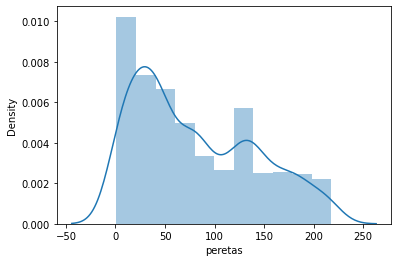

In [216]:
import seaborn as sns
fig = sns.distplot(zoneH['peretas'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



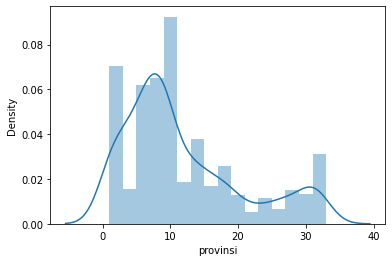

In [217]:
import seaborn as sns
fig = sns.distplot(zoneH['provinsi'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



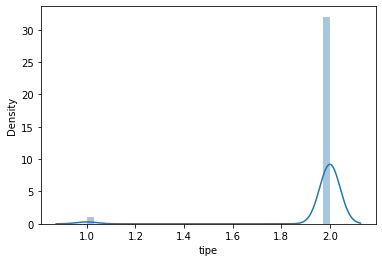

In [218]:
import seaborn as sns
fig = sns.distplot(zoneH['tipe'])
plt.show()

In [219]:
zoneH_2021 = pd.read_excel('ZoneH-2021.xlsx')

In [220]:
df = [zoneH_2021,zoneH]
result = pd.concat(df,axis=1)
result = result.drop(["waktu","web","url","Arsip"],axis=1)

In [254]:
result.head(10)

,peretas,provinsi,tipe,peretas,provinsi,tipe
0,Stressed Hacker Team,Kalimantan Barat,Subdomain,1,1,2
1,AnonCoders,Jawa Timur,Subdomain,2,2,2
2,AnonCoders,Jawa Timur,Subdomain,2,2,2
3,AnonCoders,Bali,Subdomain,2,3,2
4,AnonCoders,Sulawesi Tengah,Subdomain,2,4,2
5,AnonCoders,Sulawesi Selatan,Subdomain,2,5,2
6,AnonCoders,Sulawesi Selatan,Subdomain,2,5,2
7,AnonCoders,Sulawesi Selatan,Subdomain,2,5,2
8,AnonCoders,Sulawesi Selatan,Subdomain,2,5,2
9,AnonCoders,Sulawesi Selatan,Subdomain,2,5,2


In [222]:
from sklearn.naive_bayes import GaussianNB

In [223]:
modelnb = GaussianNB()

In [224]:
x = zoneH.drop(["tipe"],axis=1)
print(x)

      peretas  provinsi
0           1         1
1           2         2
2           2         2
3           2         3
4           2         4
...       ...       ...
1120      216         1
1121       89        17
1122      217         3
1123      218        32
1124      218        32

[1125 rows x 2 columns]


In [225]:
y = zoneH["tipe"]
print(y)

0       2
1       2
2       2
3       2
4       2
       ..
1120    2
1121    2
1122    2
1123    2
1124    2
Name: tipe, Length: 1125, dtype: object


In [226]:
from sklearn.model_selection import train_test_split

In [227]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [253]:
x_train.head(10)

,peretas,provinsi
487,121,26
1111,216,1
546,6,16
31,4,9
924,52,5
536,109,9
805,124,9
124,20,9
732,47,30
429,78,7


In [251]:
y_train.head(10)

487     2
1111    2
546     2
31      2
924     2
536     2
805     2
124     2
732     2
429     2
Name: tipe, dtype: object

In [258]:
x_test.head(30)

,peretas,provinsi
690,138,2
1049,89,15
95,26,9
558,110,30
850,166,9
306,42,9
72,10,9
226,51,8
418,102,7
868,186,9


In [239]:
x_test.shape

(225, 2)

In [240]:
nbtrain = modelnb.fit(x_train, y_train)
nbtrain.class_count_

array([ 23., 877.])

In [241]:
y_pred = nbtrain.predict(x_test)
y_pred

array(['2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2

In [234]:
probabilitas = nbtrain.predict_proba(x_test)
probabilitas.shape

(225, 2)

In [235]:
probabilitas

array([[0.02723224, 0.97276776],
       [0.02119133, 0.97880867],
       [0.01523278, 0.98476722],
       [0.02772449, 0.97227551],
       [0.04159658, 0.95840342],
       [0.01578389, 0.98421611],
       [0.01500958, 0.98499042],
       [0.01603654, 0.98396346],
       [0.02110817, 0.97889183],
       [0.05427367, 0.94572633],
       [0.02947187, 0.97052813],
       [0.0149121 , 0.9850879 ],
       [0.03179917, 0.96820083],
       [0.01657311, 0.98342689],
       [0.01974879, 0.98025121],
       [0.03941   , 0.96059   ],
       [0.02292395, 0.97707605],
       [0.01827597, 0.98172403],
       [0.04182058, 0.95817942],
       [0.02321255, 0.97678745],
       [0.01755352, 0.98244648],
       [0.02801455, 0.97198545],
       [0.01621176, 0.98378824],
       [0.02514962, 0.97485038],
       [0.02772449, 0.97227551],
       [0.02107897, 0.97892103],
       [0.08062163, 0.91937837],
       [0.01581927, 0.98418073],
       [0.0161307 , 0.9838693 ],
       [0.02293381, 0.97706619],
       [0.